### Another architecture explanation

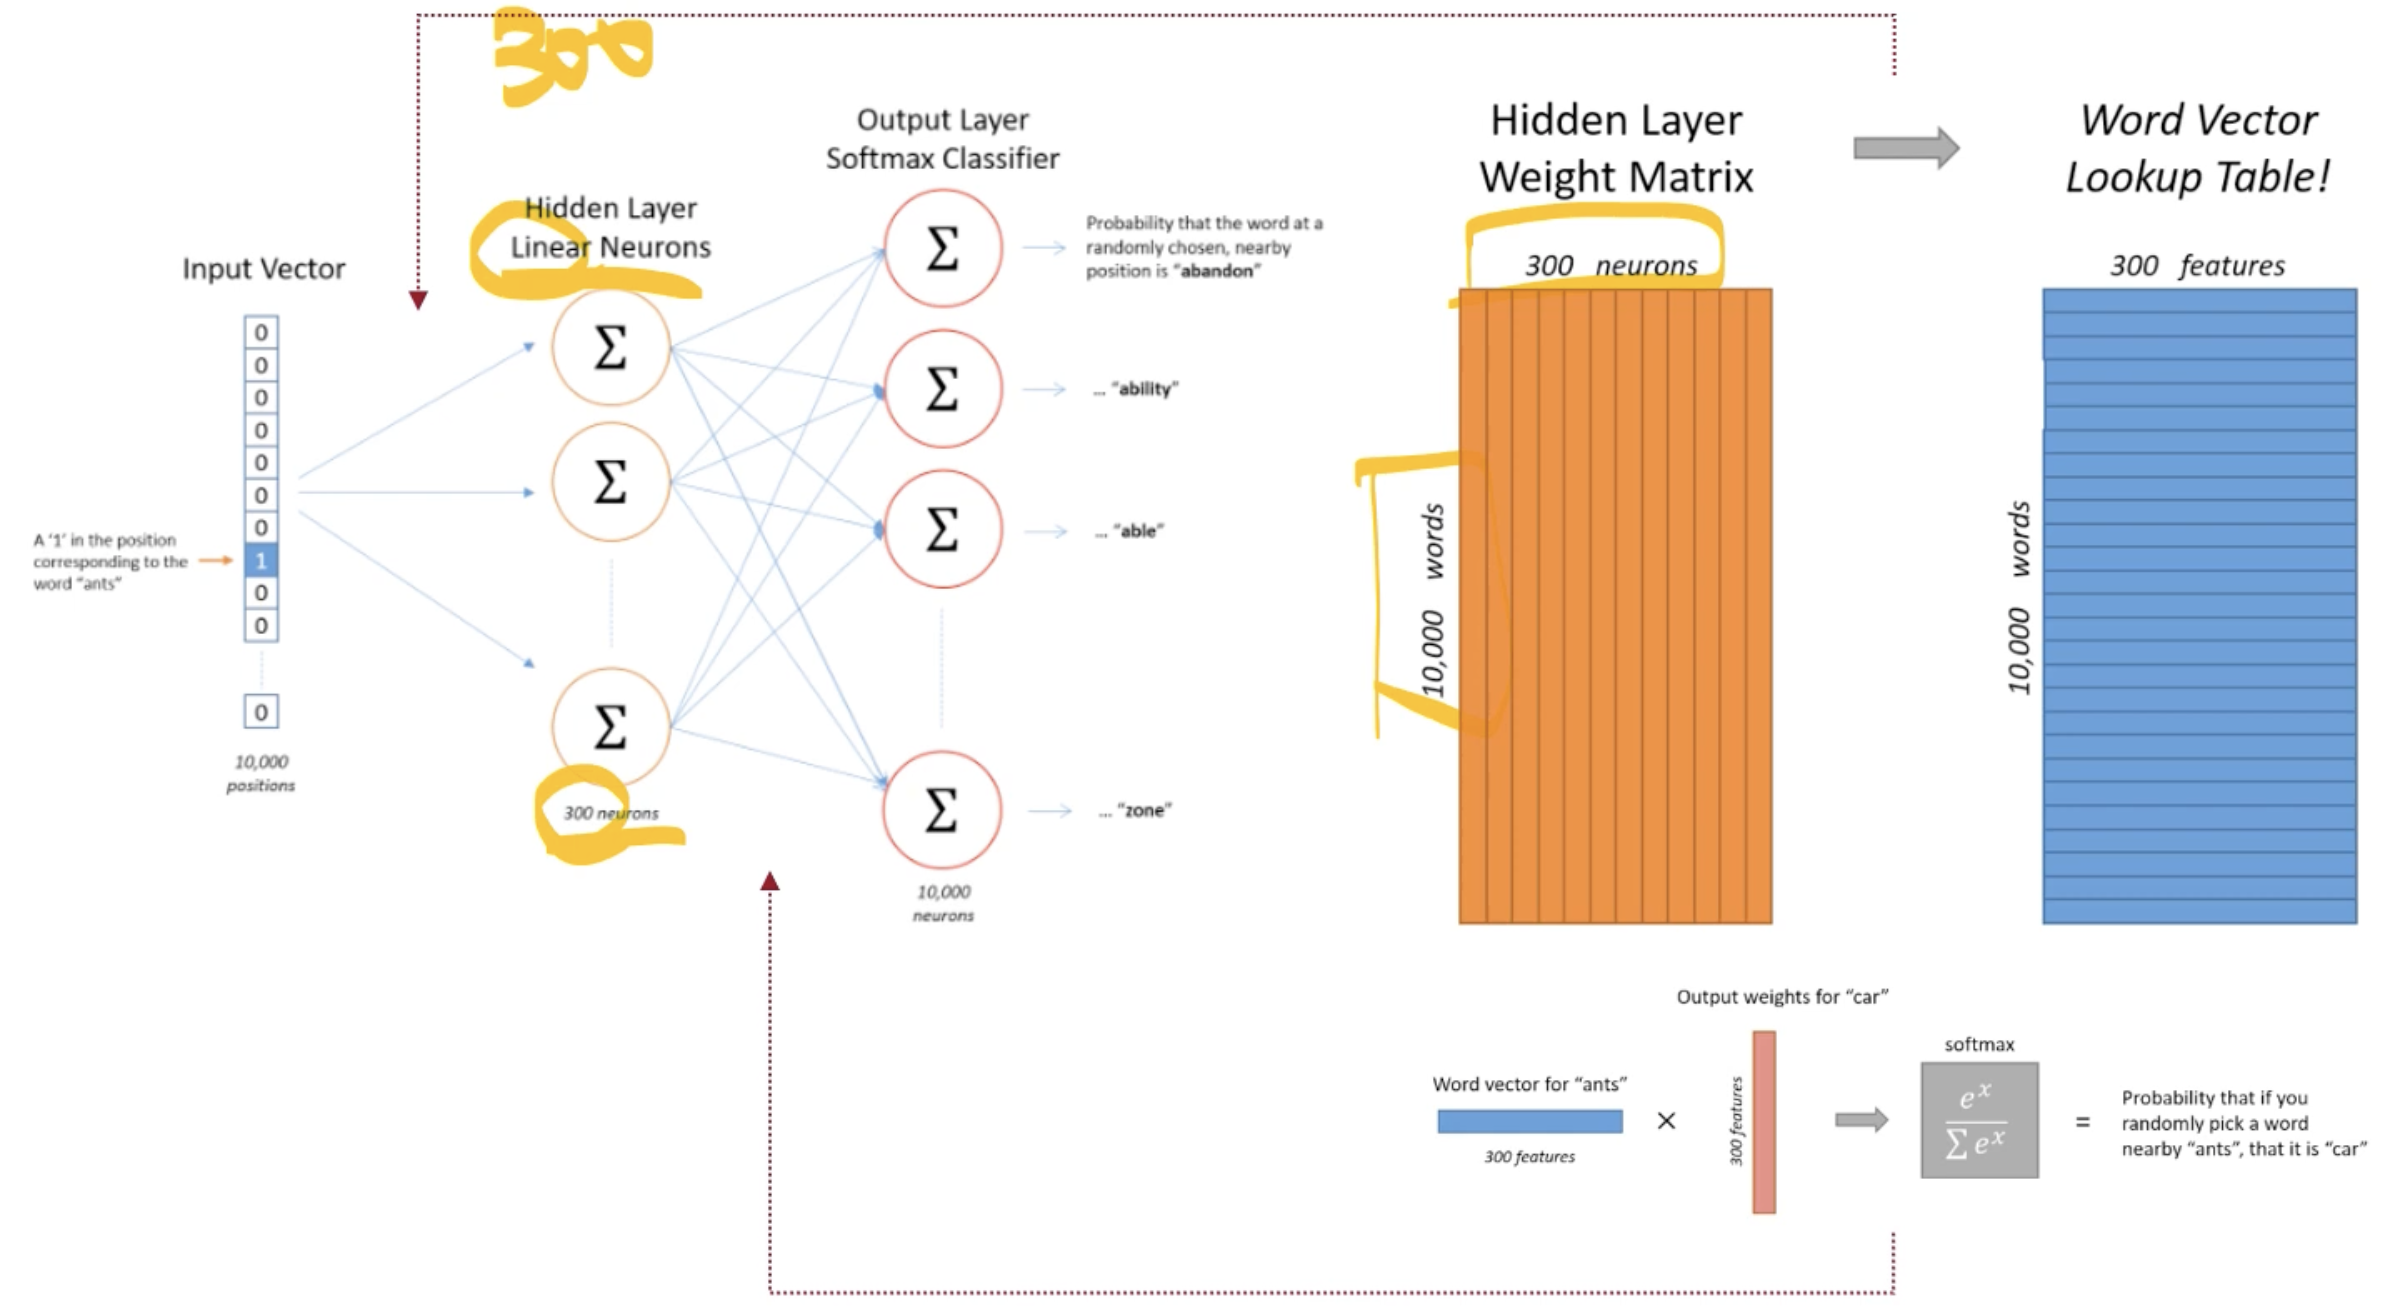

어떤 input vector가 주어졌을 때 그 단어로부터 Hidden Layer의 Linear Neurons가 300개 있고(=300차원으로 매핑한다는 의미), 단어가 10000개라고 치면 10000개 X 300차원의 Matrix가 만들어집니다. 그 다음에 Lookup Table을 행 단위로 보게 되면 각각의 단어들에 대해 하나하나의 행이 300차원의 Word Vector가 되는 겁니다. 따라서 NNLM에서 본 Lookup Table과 같은 역할을 수행하게 됩니다.   

위 그림의 예시에서 'ants'라는 단어가 예시로 주어졌다고 치면 ants에 대해서 300차원의 feature가 나타나게 되고, 해당하는 Word들에 대해서 Output마다 Lookup Table에서 300차원의 특정 단어인 다음 단어의 가능성이 있는 것을 찾아와서 내적을 하면 $e^x$가 되겠고, 그것들을 전부 다 더한게 Nomalization factor가 돼서 다음 단어가 뭐가 올지를 예측하는 확률값이 됩니다. 

### For simplicity, we use the following notation instead of $P(w_{t+j}|w_t)$ 
Word2Vec에 대한 Gradient Ascent 알고리즘을 유도하기 위해서 수식을 단순화 시켰습니다. 

$$ p(o|c) = \frac{exp(u_o^Tv_c)}{\sum_{w=1}^Wexp(u_w^Tv_c)} $$




- where $o$ is the outside (output) word id, $c$ is the center word id, $u$ and $v$ are "outside" and "center" vectors of $o$ and $c$   
 o는 output이 돼서 예측이 되는 대상이고, c는 center word입니다. 

- Every word has two vectors!
 - $v$ is a ***row of matrix W***
 - $u$ is a ***column of matrix W'***  

- Use $W' = W^T$ in practice for effcient computation

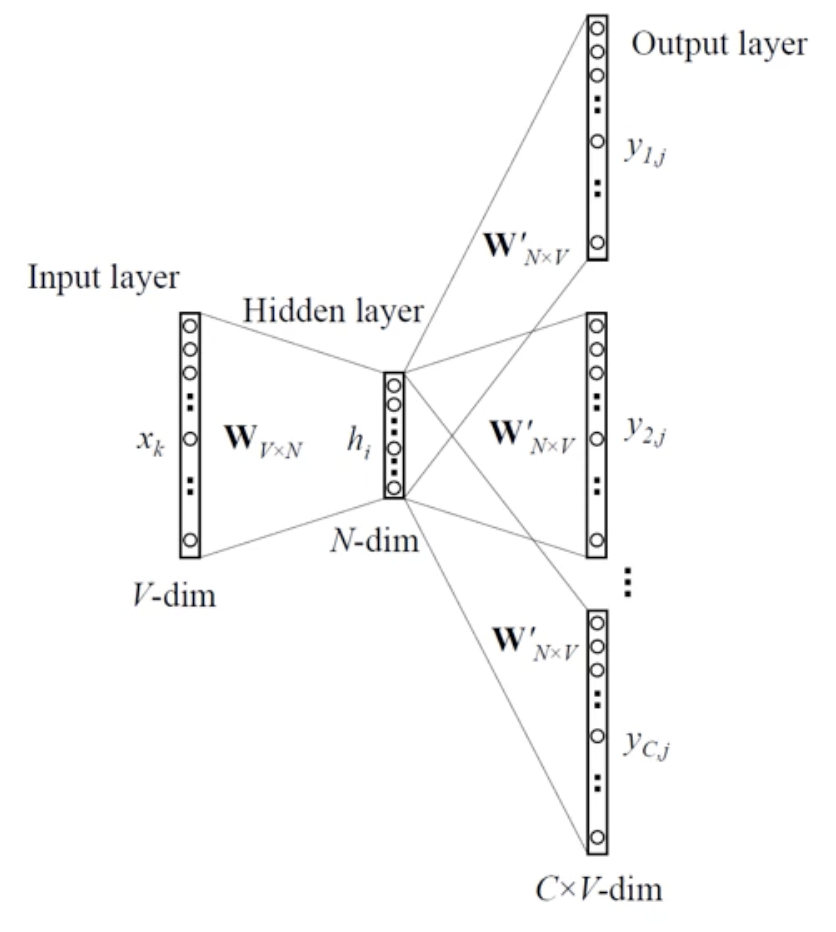

### Learning parameters with Gradient Ascent   
Word2Vec의 parameter를 학습하는 과정입니다.

$$ J(θ) = \frac{1}{T}\sum_{t=1}^T\sum_{-m≤j≤m,j≠0}  logp(w_{t+j}|w_t)$$  

$$ p(o|c) = \frac{exp(u_o^Tv_c)}{\sum_{w=1}^Wexp(u_w^Tv_c)} $$



- compute the gradient  

$$\frac{∂}{∂v_c}logp(o|c) = \frac{∂}{∂v_c}log\frac{exp(u_o^Tv_c)}{\sum_{w=1}^Wexp(u_w^Tv_c)} = \frac{∂}{∂v_c}u_o^Tv_c - \frac{∂}{∂v_c}log\sum_{w=1}^Wexp(u_w^Tv_c)    $$     

해당 수식을 밑에서 각각 part A, B로 두고 전개해 보겠습니다.


- For chunk ***A***  

$$\frac{∂}{∂v_c}u_o^Tv_c = u_o$$  

- For Chunk ***B***  

$$-\frac{∂}{∂v_c}log\sum_{w=1}^Wexp(u_w^Tv_c) =- \frac{1}{\sum_{w=1}^Wexp(u_w^Tv_c)} · (\sum_{w=1}^Wexp(u_w^Tv_c) · u_w) = -\sum_{w=1}^W\frac{exp(u_w^Tv_c)}{\sum_{w=1}^Wexp(u_w^Tv_c)} · u_w = -\sum_{w=1}^WP(w|c) · u_w $$       

- Learning parameters with Gradient Ascent  

$$\frac{∂}{∂v_c}logp(o|c) = u_o - \sum_{w=1}^WP(w|c) · u_w$$  
목적함수를 $v_c$에대해서 미분하게 되면 우변이 나오게 됩니다. $w$는 1부터 전체 Vocabulary size까지에 해당하는 파트가 계산되게 됩니다.  
조금 더 부연 설명하면 mininize가 아니라, maximize가 들어가기 때문에 Gradient Ascent가 들어가게 됩니다.

- Updata the weight vector
   
$$ v_c(t + 1) = v_c(t) + α (u_o - \sum_{w=1}^WP(w|c) · u_w $$
